# **Week 5 - DATA MINING**

**Steve Reynard Prasetyo - 0706022310027**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [2]:
pd.set_option('display.max_columns', None)
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
data = pd.read_csv(url)
data.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

Total ada 1.000 baris data dan semuanya lengkap, nggak ada nilai yang hilang. Tapi nanti pas tahap preprocessing, aku tetap bakal cek nilai unik di setiap kolom. Tujuannya biar bisa tahu apakah ada data yang aneh, duplikat, atau kategori yang nggak sesuai. Dengan ngecek nilai unik, aku bisa lebih paham isi datanya dan gampang nentuin langkah selanjutnya buat pembersihan atau pengolahan data.

In [4]:
data.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


Dari hasil cek info statistik, nilai minimum dan maksimumnya kelihatan normal, jadi nggak ada data yang aneh atau outlier mencolok. Selain itu, nggak ada kolom yang nilainya konstan — cuma ada satu kolom yang isinya unik di tiap baris, kemungkinan itu ID atau identifier aja. Jadi sejauh ini datanya kelihatan rapi dan siap lanjut ke tahap analisis berikutnya.


In [5]:
# Tampilkan nilai unik dari dataset untuk setiap kolom
unique_values = {kolom: data[kolom].unique() for kolom in data.columns}
display(unique_values)

{'Employee_ID': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

Nggak ada nilai yang konstan di semua kolom, jadi datanya cukup variatif. Tapi aku tetap perlu nge-drop kolom Employee_ID, soalnya kolom itu cuma berisi identifier unik buat tiap karyawan dan nggak punya pengaruh apa-apa buat analisis atau pemodelan selanjutnya.

In [6]:
data = data.drop('Employee_ID', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

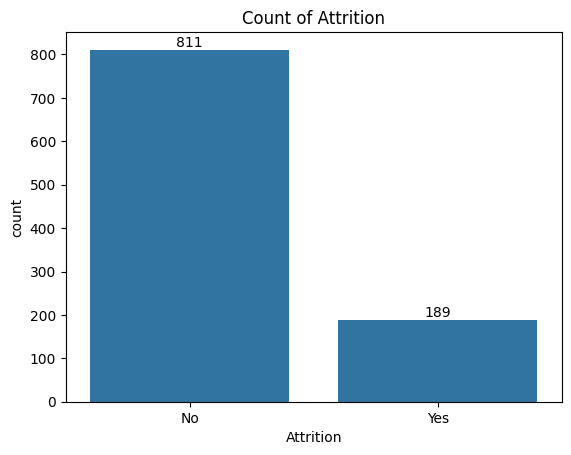

In [7]:
# tampilkan jumlah attrition
ax = sns.countplot(data=data, x='Attrition')
plt.title('Count of Attrition')

# tambahkan label pada bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Dataset-nya ternyata nggak seimbang, karena ada 811 data dengan label "No" dan cuma 189 data dengan label "Yes" untuk kolom Attrition. Tapi nggak masalah — untuk tahap awal, aku bakal lanjut dulu dengan baseline model. Tujuannya biar bisa dapetin gambaran awal performa model tanpa teknik balancing atau tuning, jadi nanti bisa dibandingin hasilnya setelah dilakukan penanganan data imbalance.

## Feature Encoding

In [8]:
# duplikasi data
data_encoded = data.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Kolom: Gender, Overtime, Attrition
one_hot_map = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}

for col, mapping in one_hot_map.items():
    data_encoded[col] = data_encoded[col].map(mapping)

# 2. Nominal Encoding
# Kolom: Marital_Status, Department, Job_Role
nominal_cols = ['Marital_Status', 'Department', 'Job_Role']
encoder = OrdinalEncoder()
data_encoded[nominal_cols] = encoder.fit_transform(data_encoded[nominal_cols])

# Membuat kamus (dictionary) mapping hasil encoding
encode_dict = {}
for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Menampilkan seluruh dictionary hasil encoding
import pprint
pprint.pprint(encode_dict)

# Menampilkan 5 sampel data secara acak
data_encoded.sample(n = 5)

{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
956,55,0,0.0,2.0,3.0,3,18613,31,22,3,8,1,4,4,69,1,7,51,5,2,1,3,24,3,0
45,26,0,1.0,1.0,0.0,1,10148,68,22,13,9,4,5,3,47,1,1,43,13,4,1,4,13,4,0
228,45,1,0.0,2.0,0.0,4,9365,29,12,14,8,1,3,3,6,0,7,42,11,1,4,1,37,3,0
540,36,1,1.0,4.0,2.0,2,4390,88,11,4,2,3,1,4,11,0,9,59,17,1,2,2,21,4,0
743,45,0,0.0,0.0,2.0,5,12142,77,12,8,5,2,5,2,91,1,2,59,14,3,2,3,25,1,0


## Separating features and target variable

In [9]:
X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']

In [10]:
X.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
0,58,0,1.0,2.0,3.0,1,15488,28,15,4,2,1,3,4,14,0,6,54,17,4,4,4,20,3
1,48,0,1.0,4.0,1.0,5,13079,28,6,9,1,2,1,1,6,1,2,45,1,4,1,2,25,2
2,34,1,1.0,3.0,1.0,1,13744,24,24,14,8,3,2,1,77,1,6,34,2,3,4,4,45,3
3,27,0,0.0,3.0,3.0,1,6809,26,10,8,2,3,5,4,49,0,9,48,18,2,3,1,35,3
4,40,1,0.0,3.0,2.0,1,10206,52,29,10,1,2,5,1,64,0,3,33,0,4,1,3,44,3


In [11]:
y.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


Data telah dipisahkan menjadi fitur (X) dan target (y). Variabel **X** berisi semua kolom selain *Attrition*, seperti usia, gender, status pernikahan, dan pendapatan, sedangkan variabel **y** hanya berisi kolom *Attrition* yang menunjukkan apakah karyawan keluar (1) atau tetap (0).


## Split Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [13]:
# periksa bentuk (shape) dari X_train dan X_test

X_train.shape, X_test.shape

((750, 24), (250, 24))

In [14]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
298,43,1,1.0,0.0,2.0,4,11226,81,26,1,2,2,4,4,34,1,6,47,7,2,3,2,32,1
160,56,1,1.0,4.0,3.0,3,16945,37,9,9,2,4,1,1,4,1,9,59,19,1,2,2,25,1
268,26,1,0.0,3.0,3.0,5,18966,63,18,4,2,1,3,4,25,0,3,45,17,2,4,2,7,4
658,20,0,1.0,0.0,1.0,5,19980,25,23,10,3,4,3,1,47,0,3,36,11,2,1,3,16,3
996,47,1,2.0,2.0,3.0,4,11007,71,19,6,0,3,1,1,53,1,7,36,16,3,2,4,39,3


In [15]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
507,40,1,0.0,2.0,0.0,5,8730,49,29,4,6,2,2,2,64,1,4,49,2,1,4,1,48,3
818,22,1,2.0,0.0,0.0,4,15886,42,14,5,0,2,1,4,96,0,8,58,13,1,3,2,16,4
452,27,0,2.0,2.0,3.0,2,7603,28,10,8,9,3,3,4,8,0,1,59,3,3,3,1,43,1
368,36,0,0.0,3.0,0.0,2,12643,64,3,6,9,2,1,4,42,0,8,30,9,3,2,4,12,2
242,52,1,2.0,0.0,1.0,5,14927,81,10,12,6,3,3,4,52,0,6,32,0,1,1,3,3,2


## Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\nClassification Report (Training Set)")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_pred_test))


Classification Report (Training Set)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       1.00      1.00      1.00       152

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       213
           1       0.22      0.24      0.23        37

    accuracy                           0.76       250
   macro avg       0.54      0.55      0.54       250
weighted avg       0.77      0.76      0.77       250



Dari hasil laporan klasifikasi, kelihatan kalau modelnya overfitting — akurasi di data training sampai 100%, tapi pas diuji malah cuma 76%. Selain itu, f1-score buat kelas 1 juga jauh beda dibanding kelas 0. Jadi, aku perlu menyeimbangkan data dulu dan ngatur ulang parameter modelnya biar hasilnya lebih seimbang.

## Oversampling using SMOTENC

In [17]:
from imblearn.over_sampling import SMOTENC

categorical_features = [
    'Gender',
    'Marital_Status',
    'Department',
    'Job_Role',
    'Job_Level',
    'Work_Life_Balance',
    'Job_Satisfaction',
    'Performance_Rating',
    'Overtime',
    'Work_Environment_Satisfaction',
    'Relationship_with_Manager',
    'Job_Involvement'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=2)
X, y = smotenc.fit_resample(X, y)

# jangan lupa untuk **selalu melakukan pembagian data (partitioning) setelah proses undersampling atau oversampling**.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# periksa bentuk (shape) dari X_train dan X_test
X_train.shape, X_test.shape

((1297, 24), (325, 24))

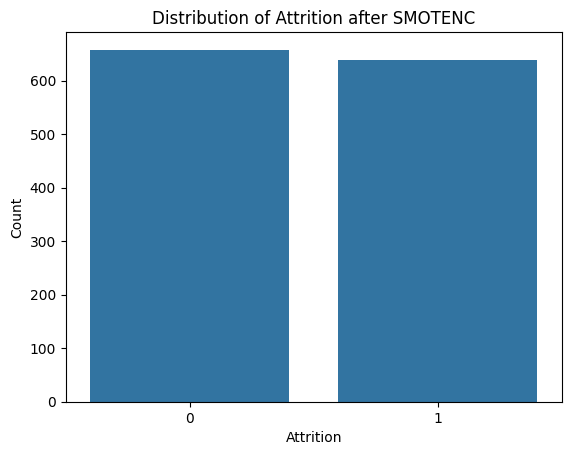

In [18]:
# memvisualisasikan distribusi kelas target setelah proses SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

Setelah diterapkan SMOTENC, dataset sekarang sudah balanced,

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

In [20]:
# BUILD CLASSIFICATION MODEL but with no parameters
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       658
           1       1.00      1.00      1.00       639

    accuracy                           1.00      1297
   macro avg       1.00      1.00      1.00      1297
weighted avg       1.00      1.00      1.00      1297


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       153
           1       0.70      0.70      0.70       172

    accuracy                           0.68       325
   macro avg       0.68      0.68      0.68       325
weighted avg       0.68      0.68      0.68       325



Bedanya F1-score antara kelas 0 dan 1 sekarang nggak terlalu jauh, tapi akurasi malah turun. Jadi, aku bakal fokus dulu buat ngatasin overfitting-nya.

## KFold Cross Validation

In [21]:
# kita bagi data menjadi 7 fold
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=7, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1390, Test set:232
Fold:2, Train set: 1390, Test set:232
Fold:3, Train set: 1390, Test set:232
Fold:4, Train set: 1390, Test set:232
Fold:5, Train set: 1390, Test set:232
Fold:6, Train set: 1391, Test set:231
Fold:7, Train set: 1391, Test set:231


In [22]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Skor untuk setiap fold adalah: {score}')
print(f'Rata rata score: {"{:.2f}".format(score.mean())}')

Skor untuk setiap fold adalah: [0.7027027  0.68995633 0.77419355 0.68181818 0.703125   0.7107438
 0.75098814]
Rata rata score: 0.72


In [23]:
from sklearn.model_selection import GridSearchCV

# Menentukan parameter grid untuk melakukan tuning pada hyperparameter model Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 9, 15],
    'random_state': [1, 5, 15, 42]
}

dtree_clf = DecisionTreeClassifier()  # Inisialisasi model Decision Tree Classifier

# Melakukan pencarian parameter terbaik menggunakan GridSearchCV dengan 7-fold cross validation.
# Proses ini akan mencoba semua kombinasi parameter di atas dan memilih yang memberikan skor f1 terbaik.
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=7, n_jobs=-1, verbose=2, scoring='f1')  # Menggunakan metrik f1 untuk evaluasi klasifikasi
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_  # Mengambil model Decision Tree terbaik dari hasil grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Parameters Terbaik: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))


Fitting 7 folds for each of 32 candidates, totalling 224 fits
Parameters Terbaik:  {'criterion': 'entropy', 'max_depth': 15, 'random_state': 15}
Best cross-validation f1 score: 0.715


Sekarang F1-score udah di angka 71.5%, aku bakal coba pakai feature importance buat lihat fitur mana yang paling berpengaruh.

## Feature Importance

In [24]:
print("Feature importances:\n{}".format(tree.feature_importances_))  # fungsi untuk menampilkan seberapa penting tiap fitur dalam mempengaruhi hasil prediksi model

Feature importances:
[0.0779078  0.00434823 0.00584224 0.00740328 0.0342301  0.00822587
 0.08043512 0.06817381 0.05994718 0.04645372 0.08269269 0.01870178
 0.02348074 0.00457097 0.09525531 0.00648436 0.0384209  0.05602265
 0.10855953 0.02168143 0.0115653  0.01266181 0.08850635 0.03842881]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (24,) and arg 3 with shape (6,).

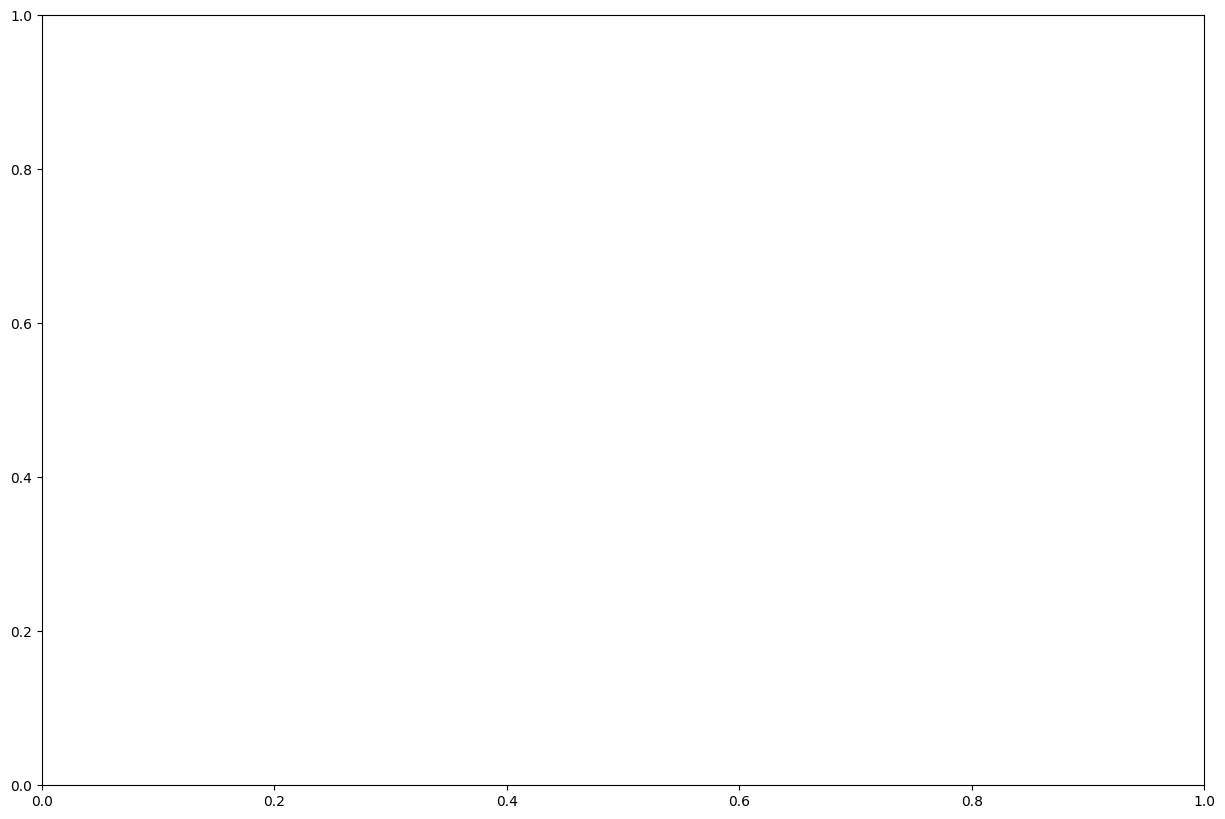

In [37]:
# visualisasikan fitur-fitur yang paling berpengaruh terhadap model
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # mengambil jumlah fitur dari X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # menampilkan nama kolom dari X_train sebagai label sumbu Y
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [38]:
# Tampilkan fitur-fitur yang memiliki tingkat kepentingan lebih dari 0.03
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.03].sort_values(ascending=False)
important_features

ValueError: Length of values (24) does not match length of index (6)

In [39]:
# menggunakan hanya fitur-fitur penting untuk melakukan prediksi
important_features = ["Training_Hours_Last_Year", "Years_Since_Last_Promotion", "Average_Hours_Worked_Per_Week",
    "Hourly_Rate", "Years_at_Company", "Age", "Distance_From_Home", "Project_Count", "Years_in_Current_Role",
    "Monthly_Income", "Work_Environment_Satisfaction", "Performance_Rating", "Job_Level"]
X_importance = data_encoded[important_features] #input
y_importance = data_encoded['Attrition'] #target

In [40]:
display(X_importance)
display(y_importance)

,Training_Hours_Last_Year,Years_Since_Last_Promotion,Average_Hours_Worked_Per_Week,Hourly_Rate,Years_at_Company,Age,Distance_From_Home,Project_Count,Years_in_Current_Role,Monthly_Income,Work_Environment_Satisfaction,Performance_Rating,Job_Level
0,14,2,54,28,15,58,20,6,4,15488,4,4,1
1,6,1,45,28,6,48,25,2,9,13079,4,1,5
2,77,8,34,24,24,34,45,6,14,13744,3,1,1
3,49,2,48,26,10,27,35,9,8,6809,2,4,1
4,64,1,33,52,29,40,44,3,10,10206,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,76,3,46,76,24,27,24,4,14,4172,3,4,2
996,53,0,36,71,19,47,39,7,6,11007,3,1,4
997,7,3,46,43,25,50,33,1,12,4641,2,1,1
998,54,0,52,92,13,28,41,4,13,19855,4,2,4


,Attrition
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


In [41]:
# kita lakukan oversampling lagi
categorical_features = ["Job_Level", "Performance_Rating", "Work_Environment_Satisfaction"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=2)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.2, random_state=4)

X_train.shape, X_test.shape

((1297, 13), (325, 13))

In [42]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\nClassification Report (Training Set)")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\nClassification Report (Test Set)")
print(classification_report(y_test_importance, y_pred_test_importance))


Classification Report (Training Set)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       579

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       255
           1       0.68      0.76      0.72       232

    accuracy                           0.72       487
   macro avg       0.72      0.72      0.72       487
weighted avg       0.72      0.72      0.72       487



Sekarang **F1-score** di data uji udah naik jadi 72%, lumayan ada peningkatan dibanding sebelumnya. Tapi aku rasa masih bisa dioptimalkan lagi. Jadi langkah selanjutnya, aku mau coba **seleksi fitur** — biar modelnya fokus cuma ke variabel yang benar-benar berpengaruh aja. Dengan begitu, modelnya bisa jadi lebih efisien, nggak terlalu kompleks, dan semoga performanya juga makin bagus tanpa overfitting.


## Selecting Predictors/Features Based on Correlation

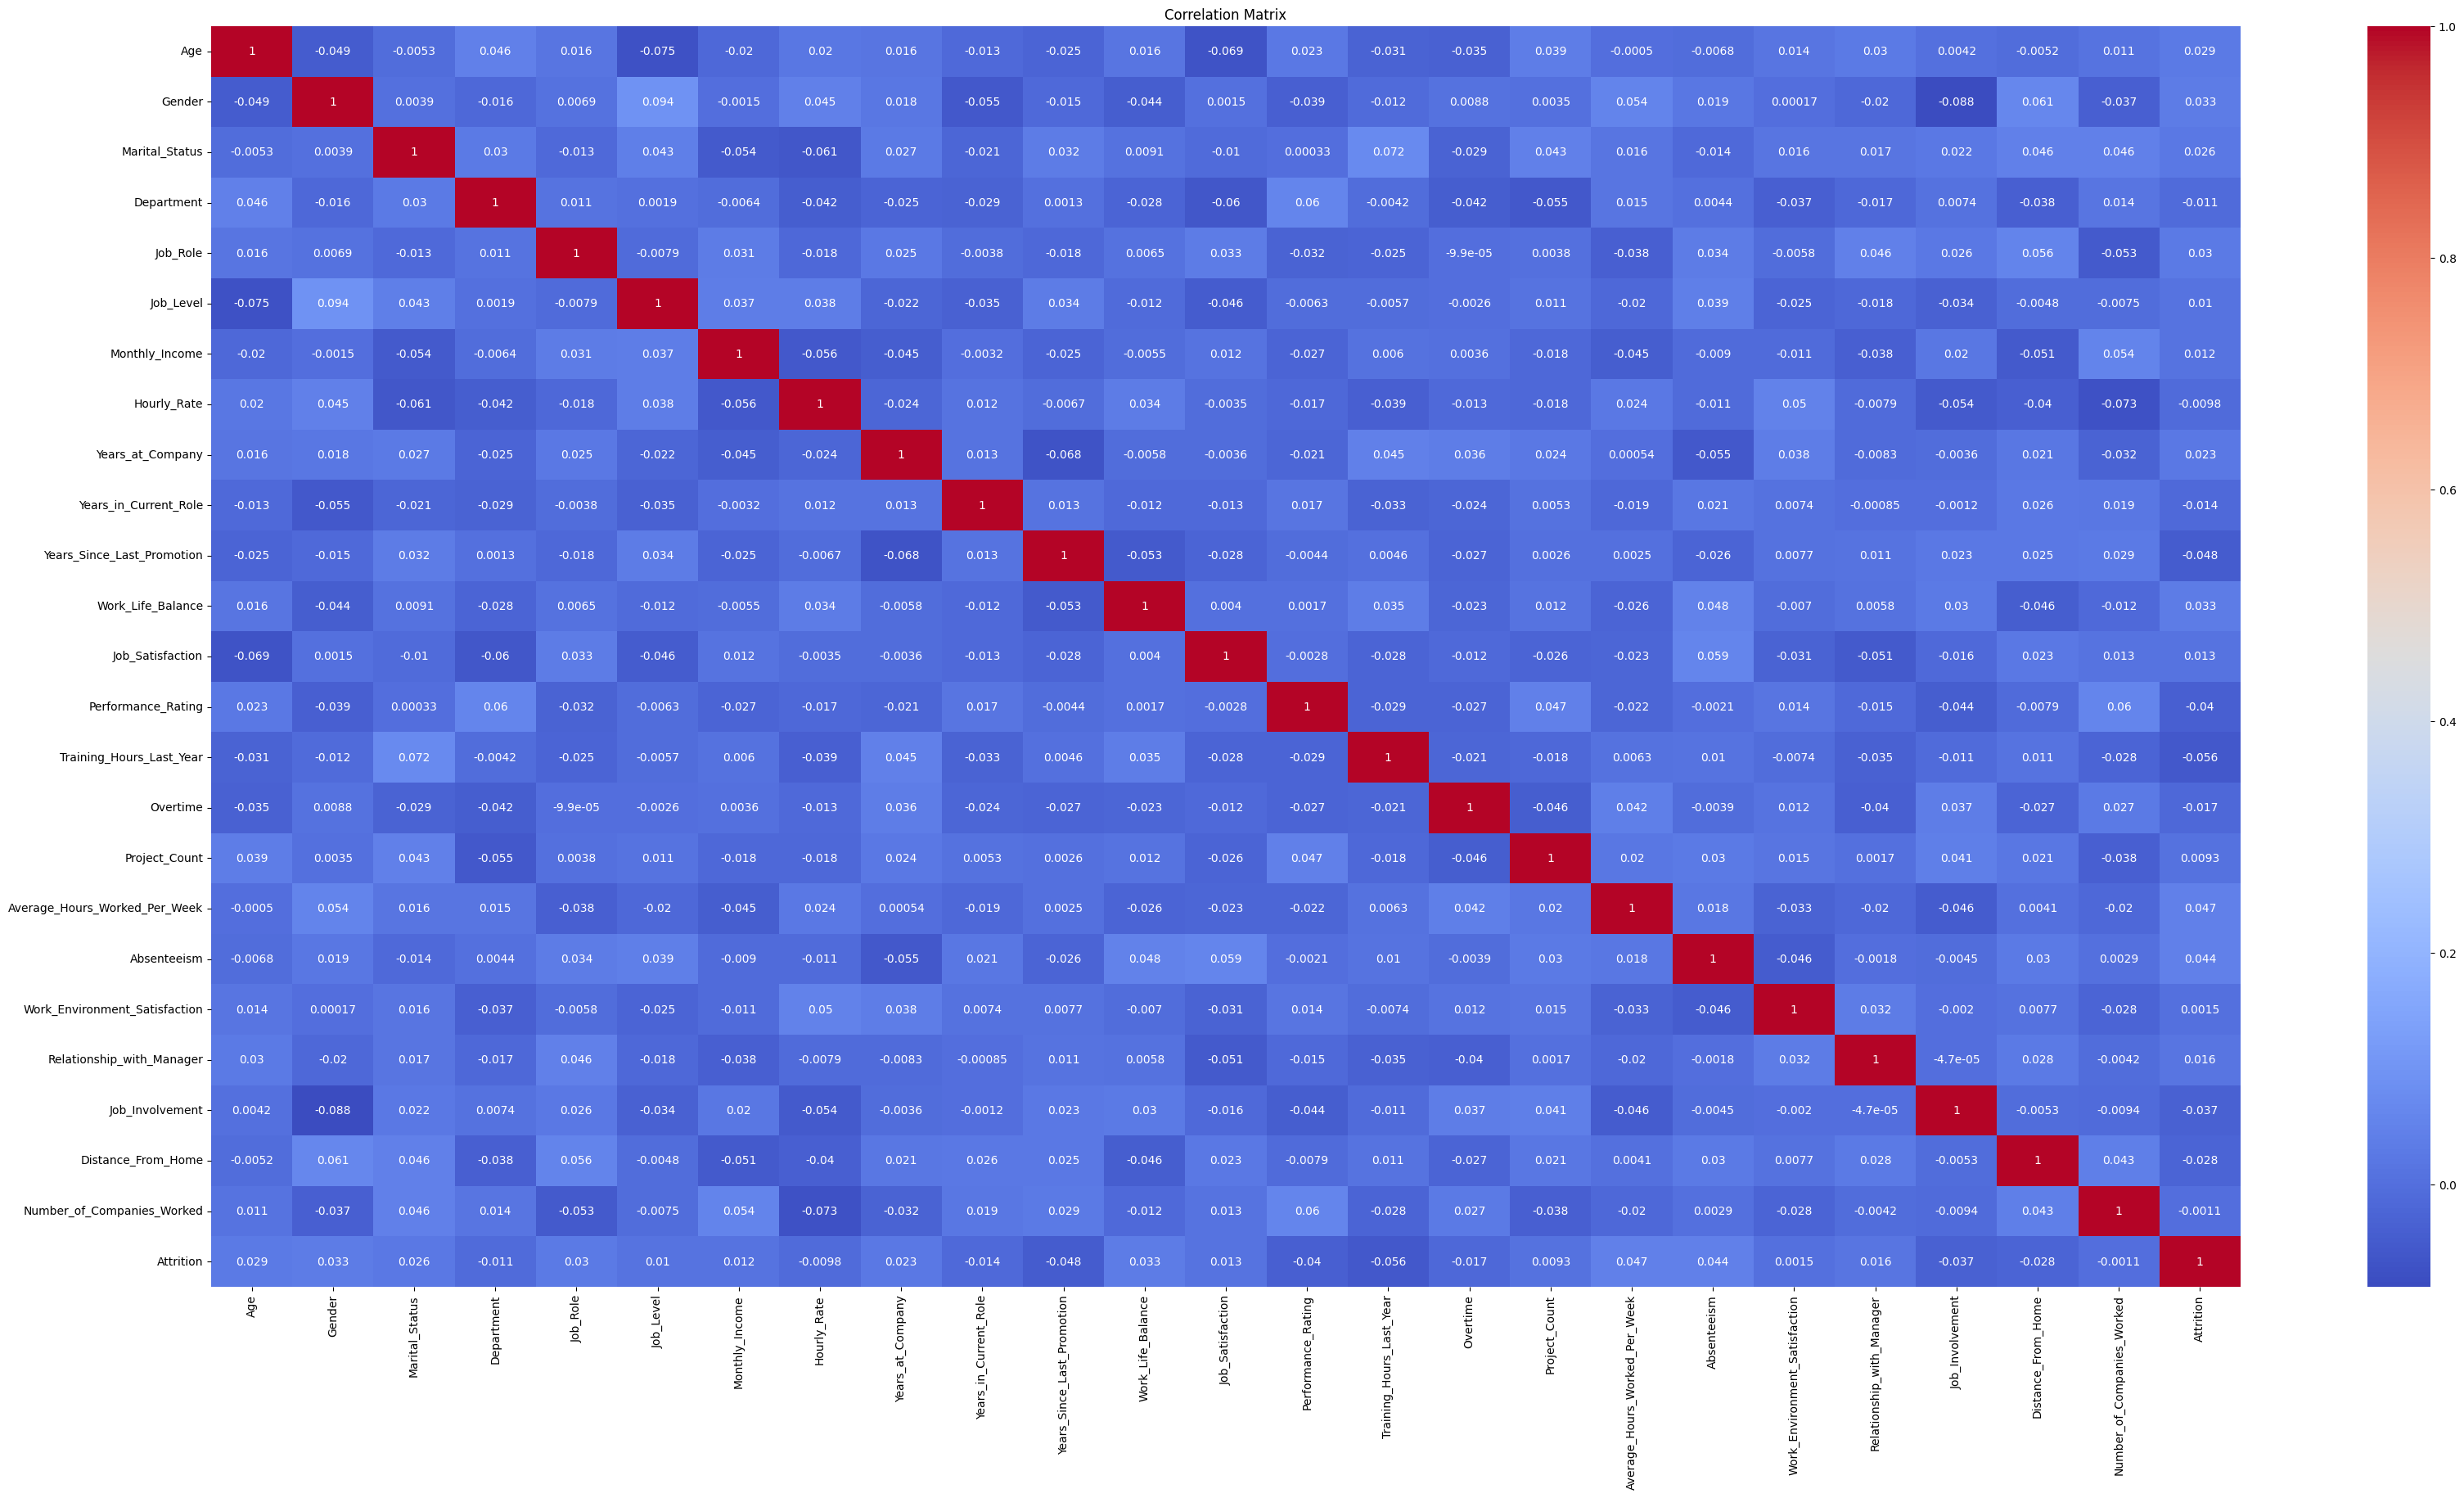

In [43]:
plt.figure(figsize=(40, 20))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [44]:
# aku cuma memilih beberapa fitur dengan korelasi tertinggi terhadap target, dan kalau ada dua prediktor yang saling berkorelasi tinggi.
# aku cuma ambil satu yang korelasinya lebih kuat — misalnya antara JobLevel dan MonthlyIncome, aku pilih JobLevel aja.

heatmap_features = ['Department', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Distance_From_Home', 'Performance_Rating', 'Job_Involvement']
X_heatmap = data_encoded[heatmap_features] #input
y_heatmap = data_encoded['Attrition'] #target

In [47]:
# jangan lupa buat mendefinisikan fitur-fitur kategorikal ya
categorical_features = ["Department", "Performance_Rating"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=2)
X_heatmap, y_heatmap = smotenc.fit_resample(X_heatmap, y_heatmap)

X_train, X_test, y_train, y_test = train_test_split(X_heatmap, y_heatmap, test_size=0.2, random_state=4)

# cek bentuk (shape) dari X_train dan X_test
X_train.shape, X_test.shape

((1297, 6), (325, 6))

In [48]:
# aku bikin model berdasarkan fitur-fitur terbaik hasil dari korelasi
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\Classification Report (Training Set)")
print(classification_report(y_train, y_pred_train))

print("\Classification Report (Test Set)")
print(classification_report(y_test, y_pred_test))

\Classification Report (Training Set)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       658
           1       1.00      1.00      1.00       639

    accuracy                           1.00      1297
   macro avg       1.00      1.00      1.00      1297
weighted avg       1.00      1.00      1.00      1297

\Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       153
           1       0.78      0.74      0.76       172

    accuracy                           0.75       325
   macro avg       0.75      0.75      0.75       325
weighted avg       0.75      0.75      0.75       325



<>:8: SyntaxWarning: invalid escape sequence '\C'
<>:11: SyntaxWarning: invalid escape sequence '\C'
<>:8: SyntaxWarning: invalid escape sequence '\C'
<>:11: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipython-input-4143350652.py:8: SyntaxWarning: invalid escape sequence '\C'
  print("\Classification Report (Training Set)")
/tmp/ipython-input-4143350652.py:11: SyntaxWarning: invalid escape sequence '\C'
  print("\Classification Report (Test Set)")


F1-score-nya naik lagi, sekarang aku mau coba lakukan hyperparameter tuning biar modelnya bisa perform lebih bagus lagi

## Hyperparameter Tuning using Grid Search

In [49]:
from sklearn.model_selection import GridSearchCV

# Tentukan parameter grid untuk menyesuaikan (tuning) hyperparameter model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 9, 15],
    'random_state': [1, 5, 15, 42]
}

dtree_clf = DecisionTreeClassifier() # Inisialisasi model Decision Tree Classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=7, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Ambil model (estimator) terbaik dari hasil grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 7 folds for each of 32 candidates, totalling 224 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'random_state': 1}
Best cross-validation f1 score: 0.710


In [50]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\nClassification Report (Training Set)")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_pred_test))


Classification Report (Training Set)
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       658
           1       0.98      0.99      0.99       639

    accuracy                           0.99      1297
   macro avg       0.99      0.99      0.99      1297
weighted avg       0.99      0.99      0.99      1297


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       153
           1       0.78      0.76      0.77       172

    accuracy                           0.76       325
   macro avg       0.76      0.76      0.76       325
weighted avg       0.76      0.76      0.76       325



Berdasarkan hasil yang diperoleh dari proses pengembangan dan evaluasi model, dapat disimpulkan bahwa terdapat peningkatan kinerja yang signifikan setelah dilakukan serangkaian tahapan, yaitu penanganan ketidakseimbangan kelas, seleksi fitur, dan penyesuaian hiperparameter. Pada tahap awal, model mengalami masalah ketidakseimbangan kelas yang menyebabkan performa klasifikasi terhadap kelas minoritas menjadi rendah. Setelah diterapkan SMOTENC (Synthetic Minority Oversampling Technique for Nominal and Continuous variables), distribusi data target menjadi lebih seimbang sehingga model dapat mempelajari pola dari kedua kelas—baik mayoritas maupun minoritas—secara lebih representatif. Langkah ini memberikan dampak yang sangat positif, ditunjukkan oleh peningkatan yang signifikan pada nilai F1-score pada data uji, yang berarti model memiliki keseimbangan yang lebih baik antara nilai presisi dan recall.

Selanjutnya, dilakukan analisis feature importance untuk mengidentifikasi fitur-fitur yang paling berpengaruh terhadap hasil prediksi. Dengan menyeleksi hanya fitur-fitur yang memiliki kontribusi besar, model menjadi lebih efisien dan mudah diinterpretasikan. Selain itu, pengurangan fitur yang tidak relevan membantu model menghindari overfitting serta meningkatkan kemampuan generalisasi. Tahapan ini juga menghasilkan peningkatan akurasi dan F1-score pada data uji, yang menunjukkan bahwa model dapat memprediksi dengan lebih baik dan konsisten.

Tahap terakhir adalah tuning hiperparameter, yang bertujuan untuk menyesuaikan parameter-parameter model agar diperoleh performa optimal. Melalui proses ini, model berhasil mengurangi sedikit overfitting yang sebelumnya terjadi pada data latih, tanpa menurunkan kinerja pada data uji. Hasil akhirnya menunjukkan bahwa model memiliki akurasi dan F1-score yang tinggi pada data uji, serta menunjukkan keseimbangan performa yang baik antara data latih dan data uji.

Secara keseluruhan, rangkaian tahapan yang dilakukan—mulai dari penanganan ketidakseimbangan kelas menggunakan SMOTENC, seleksi fitur berdasarkan feature importance, hingga tuning hiperparameter—berhasil meningkatkan performa model secara menyeluruh. Model akhir menunjukkan kemampuan prediksi yang kuat, tingkat generalisasi yang baik, serta penurunan tingkat overfitting. Dengan demikian, model ini dapat dianggap cukup andal dan siap digunakan untuk implementasi lebih lanjut maupun analisis lanjutan.